In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import CyclicLR

%run '/kaggle/input/grrn-model/GRRN.ipynb'
%run '/kaggle/input/cte-model/dataloader_imreshape_change.ipynb'

import numpy as np
import os

torch.Size([1, 105])


In [2]:
class LabelSomCE(nn.Module):
	def __init__(self):
		super().__init__()

	def forward(self,x,target,smoothing=0.1):
		confidence = 1.0 - smoothing
		logprobs = F.log_softmax(x,dim=-1)
		nll_loss = - logprobs.gather(dim=-1,index=target.unsqueeze(1))
		nll_loss = nll_loss.squeeze(1)
		smooth_loss = -logprobs.mean(dim=-1)
		loss = confidence * nll_loss + smoothing * smooth_loss

		return loss.mean()

def download(folder,thetarfile):
    import urllib.request
    import tarfile
    ftpstream = urllib.request.urlopen(thetarfile)
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall(folder)
    thetarfile.close()

def download_cerug(folder):
    local_tarfile = "/CERUG-EN-train-images.tar.gz"
    extract_local_tar(local_tarfile, folder)
    #thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-train-images.tar.gz"
    #download(folder,thetarfile)
    local_tarfile = "/CERUG-EN-test-images.tar.gz"
    extract_local_tar(local_tarfile, folder)
    #thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-test-images.tar.gz"
    #download(folder,thetarfile)

def download_firemaker(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-test-images.tar.gz"
    download(folder,thetarfile)

----------
loading dataset CERUG-EN with images: 5702
number of writer is: 105
-*-*-*-*-*-*-*-*-*-*
----------
loading dataset CERUG-EN with images: 5127
number of writer is: 105
-*-*-*-*-*-*-*-*-*-*
Traing epoch: 0   avg loss is: 4.3990239542739396
Testing epoch: 0   avg testing loss is: 3.544923558784794
Testing on epoch: 0 has accuracy: top1: 16.60 top5: 50.65


/tmp/ipykernel_24/2509449959.py:136: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
/tmp/ipykernel_24/2509449959.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))


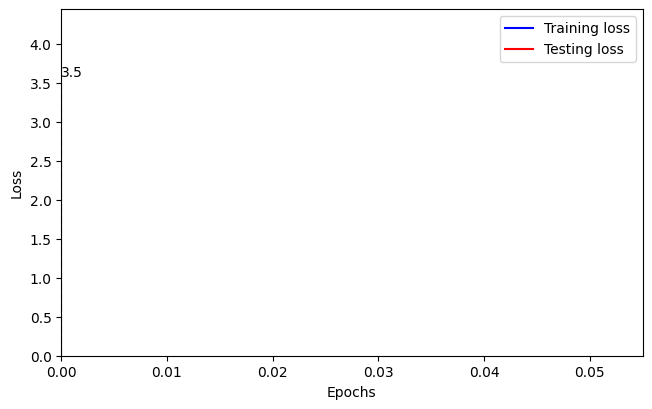

Traing epoch: 1   avg loss is: 3.1871970661548006
Testing epoch: 1   avg testing loss is: 3.0331726757536797
Testing on epoch: 1 has accuracy: top1: 30.29 top5: 68.60


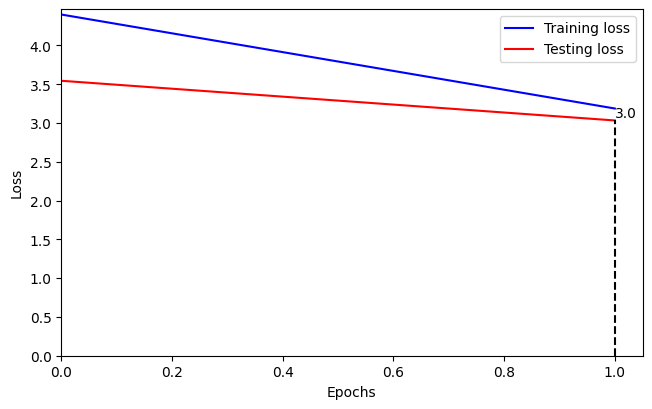

Traing epoch: 2   avg loss is: 2.785933157309097
Testing epoch: 2   avg testing loss is: 3.0537283487409073
Testing on epoch: 2 has accuracy: top1: 33.00 top5: 69.77


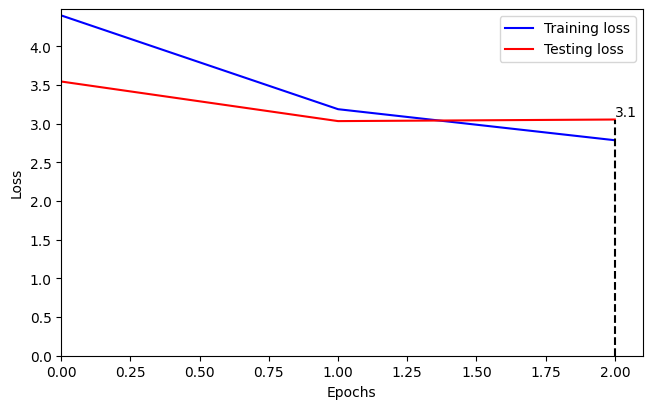

Traing epoch: 3   avg loss is: 2.5723931786058998
Testing epoch: 3   avg testing loss is: 2.955972081032869
Testing on epoch: 3 has accuracy: top1: 37.94 top5: 75.89


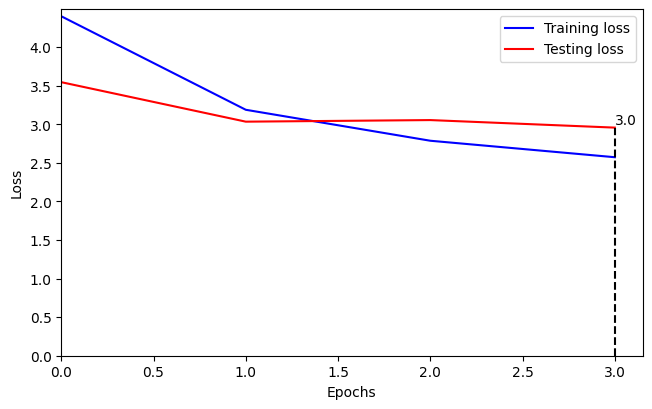

Traing epoch: 4   avg loss is: 2.423060563098149
Testing epoch: 4   avg testing loss is: 3.178056350749601
Testing on epoch: 4 has accuracy: top1: 34.35 top5: 72.50


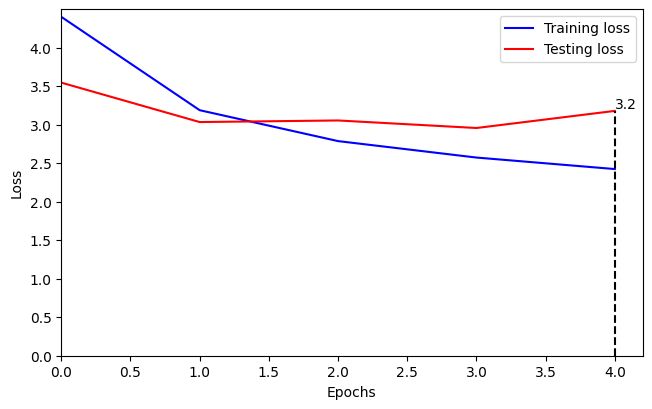

Traing epoch: 5   avg loss is: 2.2756435129822803
Testing epoch: 5   avg testing loss is: 2.7220743820303324
Testing on epoch: 5 has accuracy: top1: 46.15 top5: 79.64


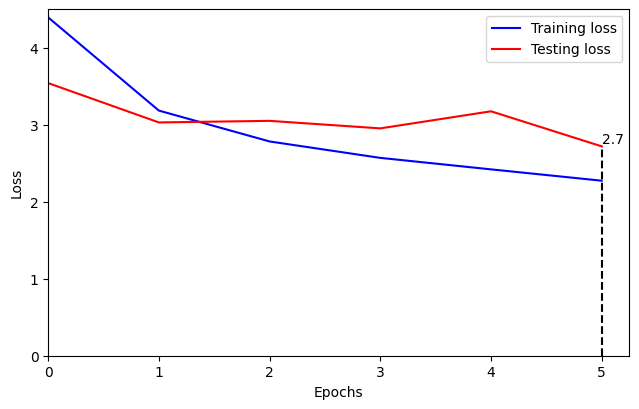

Traing epoch: 6   avg loss is: 2.175764736007242
Testing epoch: 6   avg testing loss is: 2.9337444925605323
Testing on epoch: 6 has accuracy: top1: 42.32 top5: 76.73


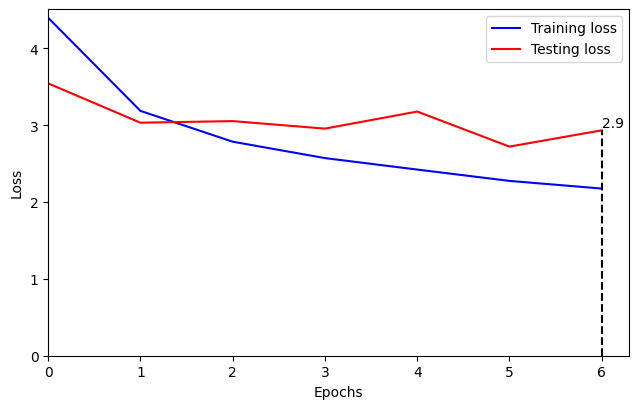

Traing epoch: 7   avg loss is: 2.0698552295273425
Testing epoch: 7   avg testing loss is: 2.9337455108529684
Testing on epoch: 7 has accuracy: top1: 44.04 top5: 79.66


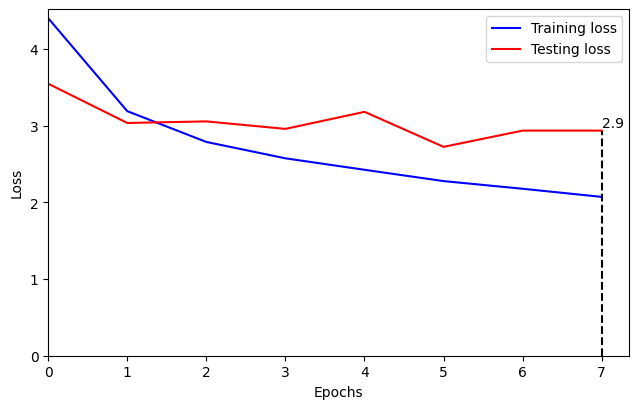

Traing epoch: 8   avg loss is: 1.9622236249827538
Testing epoch: 8   avg testing loss is: 2.912523017494107
Testing on epoch: 8 has accuracy: top1: 38.97 top5: 76.03


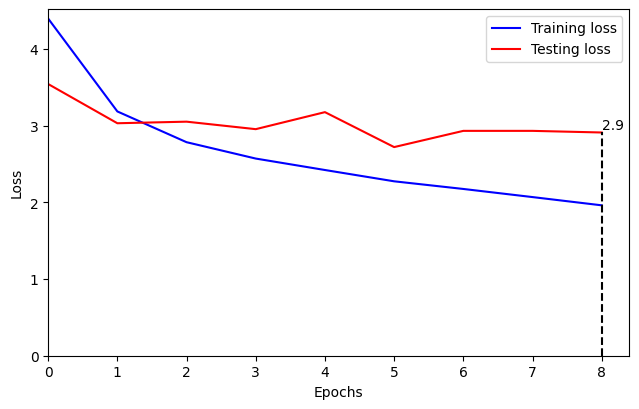

Traing epoch: 9   avg loss is: 1.7931610606297725
Testing epoch: 9   avg testing loss is: 2.26825754590495
Testing on epoch: 9 has accuracy: top1: 56.95 top5: 88.55


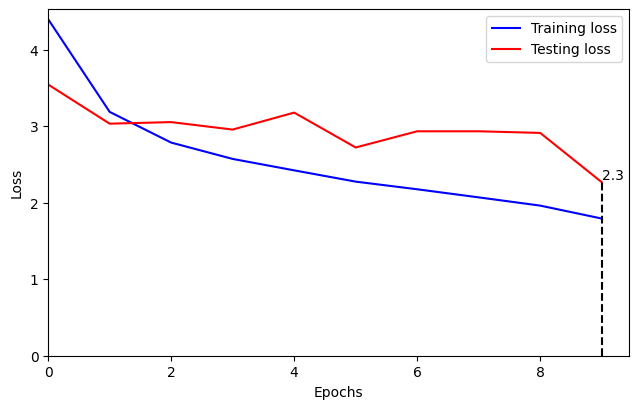

Traing epoch: 10   avg loss is: 1.6579011772193162
Testing epoch: 10   avg testing loss is: 2.2067740665417968
Testing on epoch: 10 has accuracy: top1: 60.89 top5: 88.57


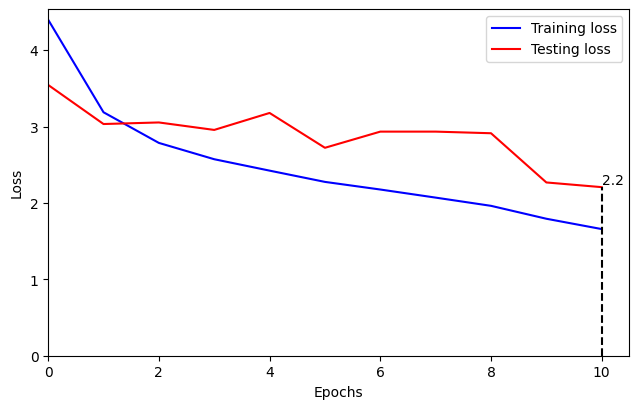

Traing epoch: 11   avg loss is: 1.5266769510023401
Testing epoch: 11   avg testing loss is: 2.670630901773399
Testing on epoch: 11 has accuracy: top1: 50.83 top5: 81.43


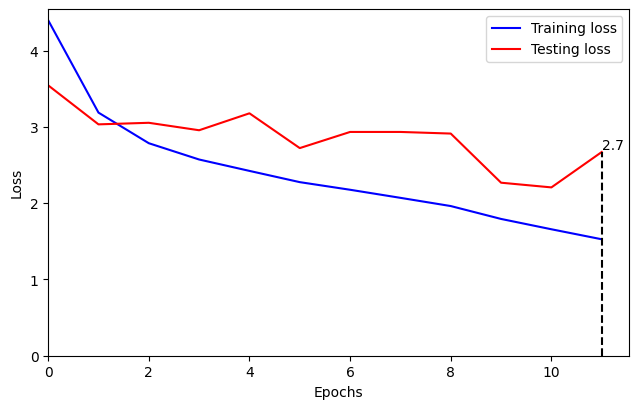

Traing epoch: 12   avg loss is: 1.4230638538755958
Testing epoch: 12   avg testing loss is: 1.9956530091175781
Testing on epoch: 12 has accuracy: top1: 64.40 top5: 90.35


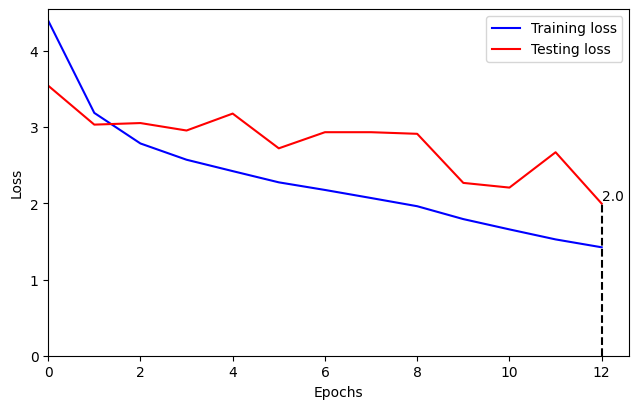

Traing epoch: 13   avg loss is: 1.307668719972883
Testing epoch: 13   avg testing loss is: 2.1170407544786687
Testing on epoch: 13 has accuracy: top1: 62.79 top5: 89.88


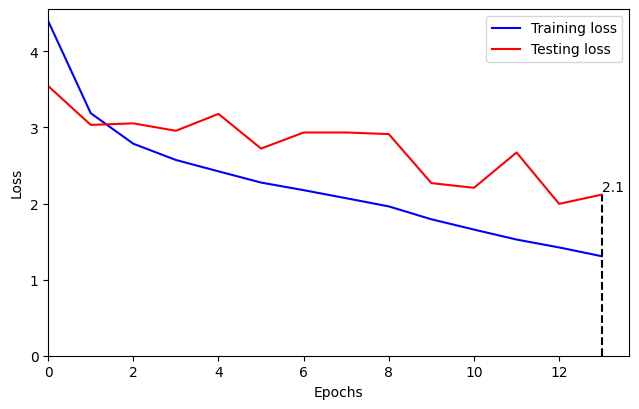

Traing epoch: 14   avg loss is: 1.237425635174877
Testing epoch: 14   avg testing loss is: 1.815980642755455
Testing on epoch: 14 has accuracy: top1: 70.70 top5: 92.47


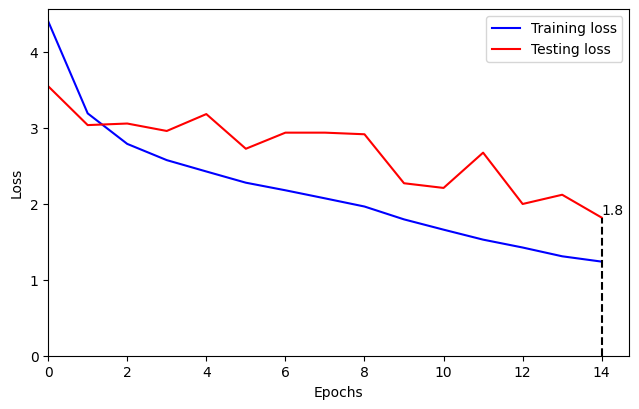

Traing epoch: 15   avg loss is: 1.1684028264187298
Testing epoch: 15   avg testing loss is: 1.6165650102579705
Testing on epoch: 15 has accuracy: top1: 77.37 top5: 95.57


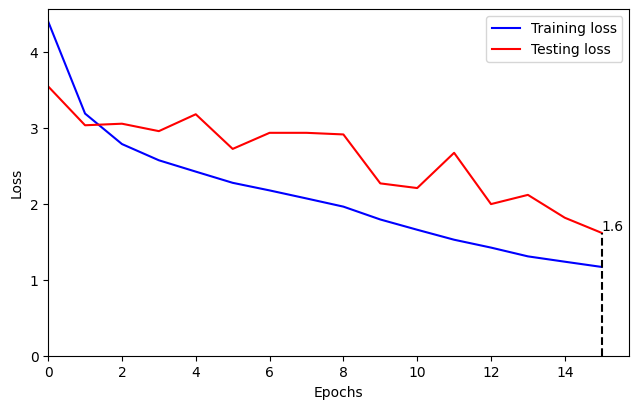

Traing epoch: 16   avg loss is: 1.1066473857695316
Testing epoch: 16   avg testing loss is: 1.6076195080332296
Testing on epoch: 16 has accuracy: top1: 78.19 top5: 94.81


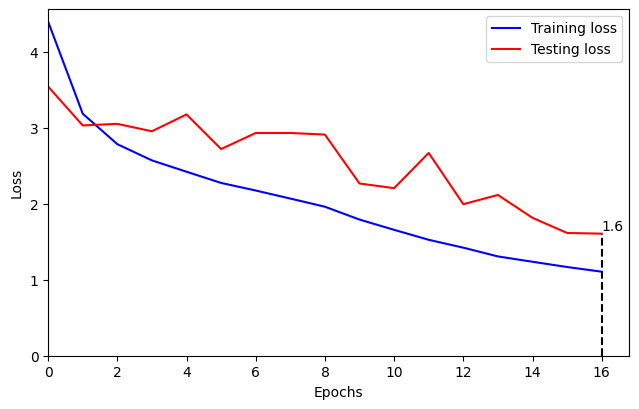

Traing epoch: 17   avg loss is: 1.1015679355429
Testing epoch: 17   avg testing loss is: 1.6216038959419987
Testing on epoch: 17 has accuracy: top1: 77.18 top5: 94.97


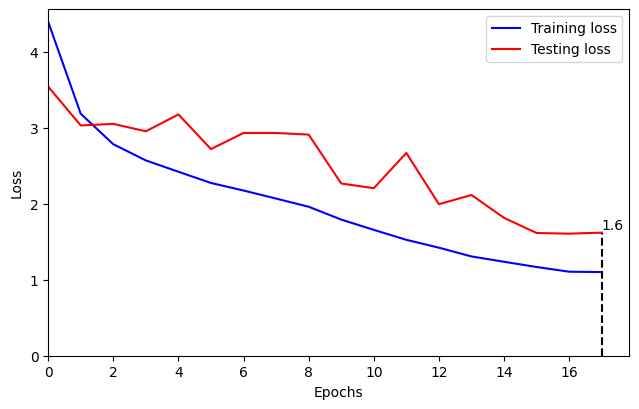

Traing epoch: 18   avg loss is: 1.1454478044803738
Testing epoch: 18   avg testing loss is: 1.8234725596377412
Testing on epoch: 18 has accuracy: top1: 70.70 top5: 93.54


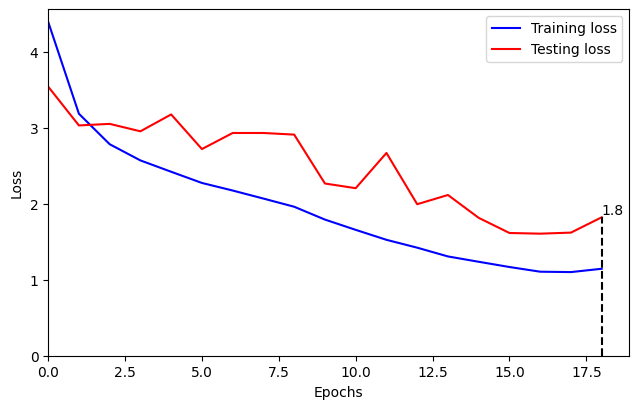

Traing epoch: 19   avg loss is: 1.1916596879478263
Testing epoch: 19   avg testing loss is: 2.055719957916165
Testing on epoch: 19 has accuracy: top1: 63.21 top5: 91.16


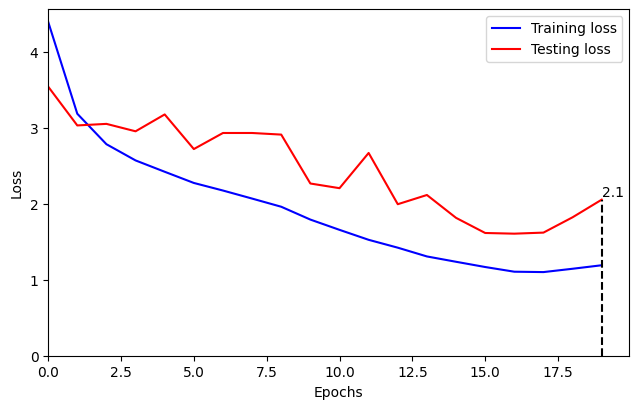

Traing epoch: 20   avg loss is: 1.235839299461087
Testing epoch: 20   avg testing loss is: 2.4702274806774294
Testing on epoch: 20 has accuracy: top1: 53.15 top5: 83.77


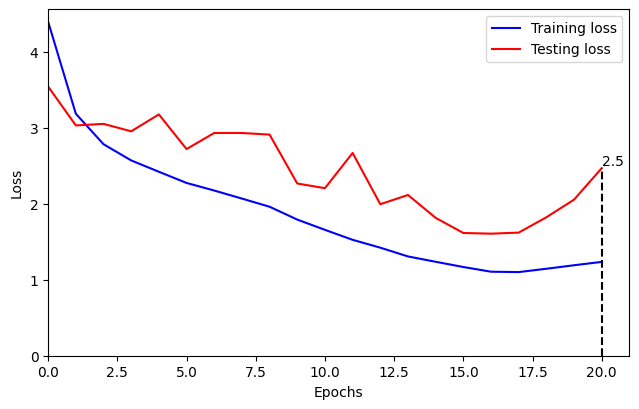

Traing epoch: 21   avg loss is: 1.2642652684567022
Testing epoch: 21   avg testing loss is: 2.253884058875087
Testing on epoch: 21 has accuracy: top1: 59.24 top5: 87.58


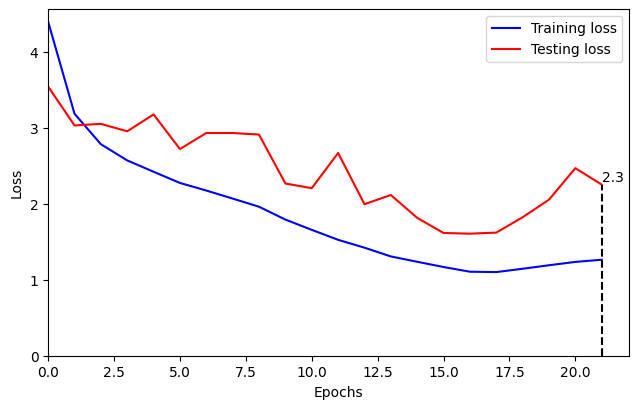

Traing epoch: 22   avg loss is: 1.2612883256597012
Testing epoch: 22   avg testing loss is: 2.298471532135366
Testing on epoch: 22 has accuracy: top1: 58.77 top5: 85.35


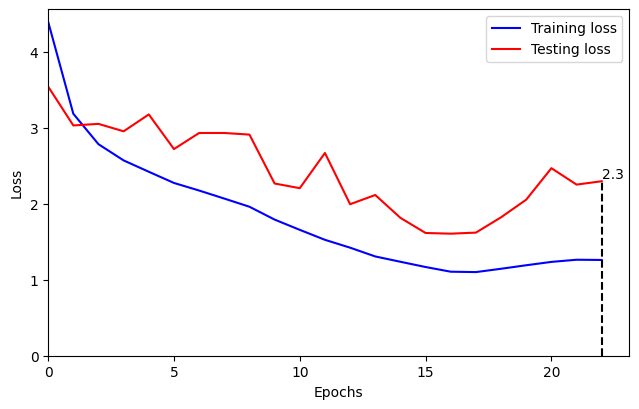

Traing epoch: 23   avg loss is: 1.331084864480155
Testing epoch: 23   avg testing loss is: 2.7061282968224023
Testing on epoch: 23 has accuracy: top1: 46.89 top5: 82.76


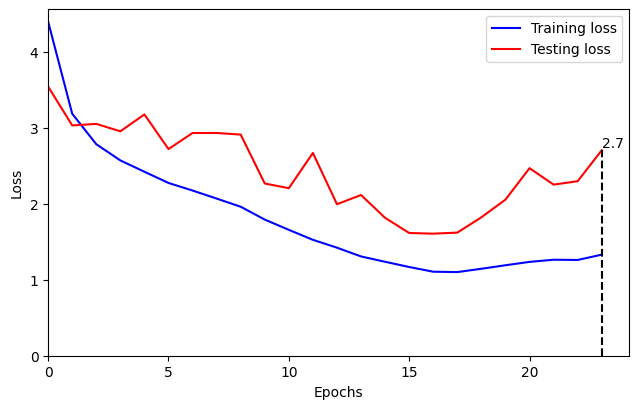

Traing epoch: 24   avg loss is: 1.3347321722019954
Testing epoch: 24   avg testing loss is: 2.8932531618997688
Testing on epoch: 24 has accuracy: top1: 46.09 top5: 80.85


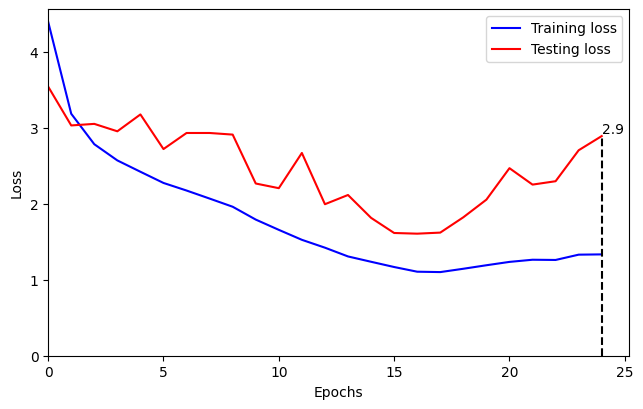

Traing epoch: 25   avg loss is: 1.2943984917899807
Testing epoch: 25   avg testing loss is: 2.1466231123309267
Testing on epoch: 25 has accuracy: top1: 61.87 top5: 88.75


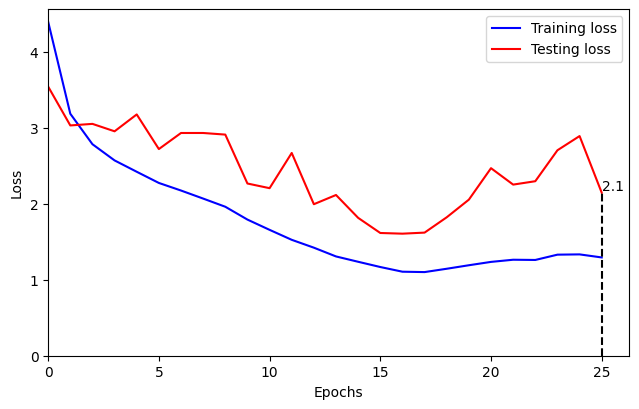

Traing epoch: 26   avg loss is: 1.1418126826526738
Testing epoch: 26   avg testing loss is: 2.0578186679109236
Testing on epoch: 26 has accuracy: top1: 65.46 top5: 89.41


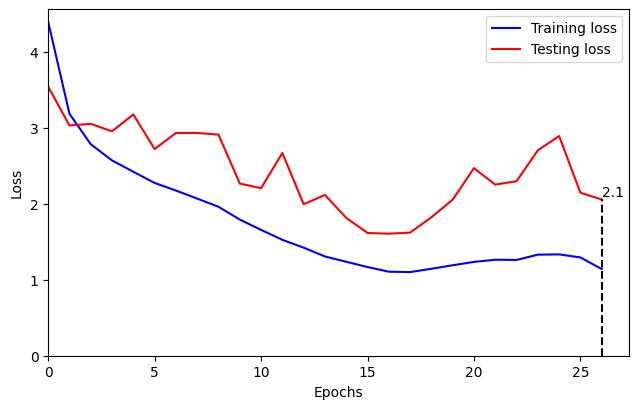

Traing epoch: 27   avg loss is: 1.0746958634766544
Testing epoch: 27   avg testing loss is: 1.7608681315573576
Testing on epoch: 27 has accuracy: top1: 73.55 top5: 92.47


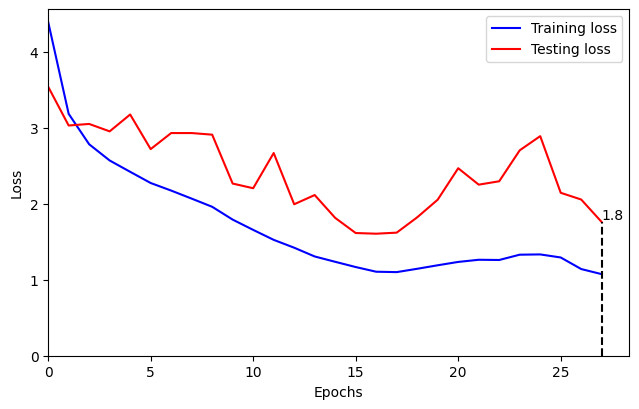

Traing epoch: 28   avg loss is: 1.021684830596133
Testing epoch: 28   avg testing loss is: 1.7569048790916848
Testing on epoch: 28 has accuracy: top1: 73.18 top5: 92.78


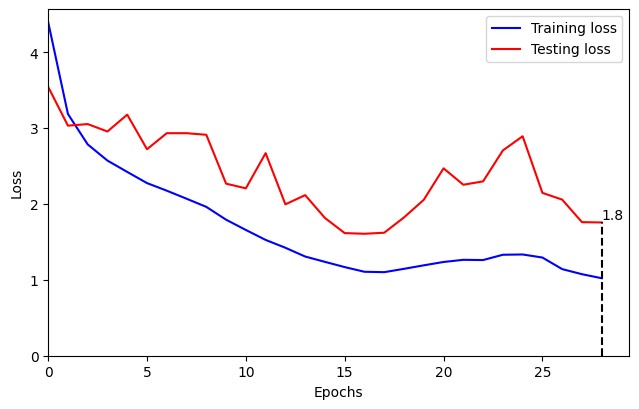

Traing epoch: 29   avg loss is: 0.9932909856657354
Testing epoch: 29   avg testing loss is: 1.6104432299872424
Testing on epoch: 29 has accuracy: top1: 76.03 top5: 95.24


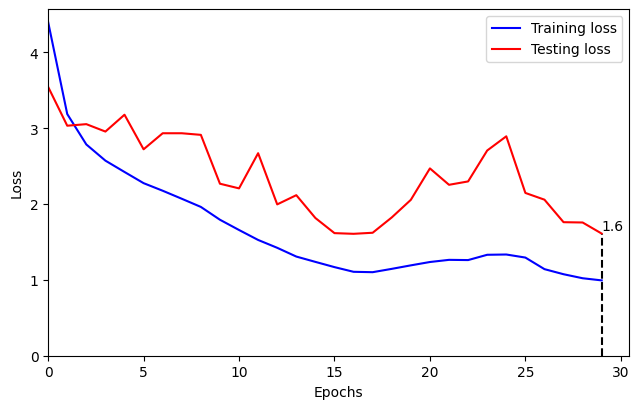

Traing epoch: 30   avg loss is: 0.9563954397409904
Testing epoch: 30   avg testing loss is: 1.483963308118957
Testing on epoch: 30 has accuracy: top1: 80.61 top5: 95.69


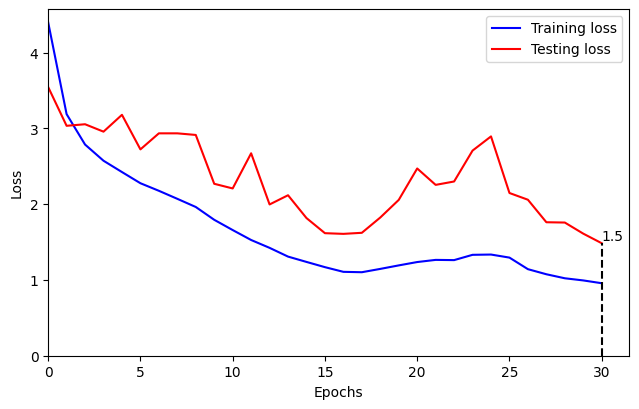

Traing epoch: 31   avg loss is: 0.9305428269864464
Testing epoch: 31   avg testing loss is: 1.5050720364505257
Testing on epoch: 31 has accuracy: top1: 80.05 top5: 95.65


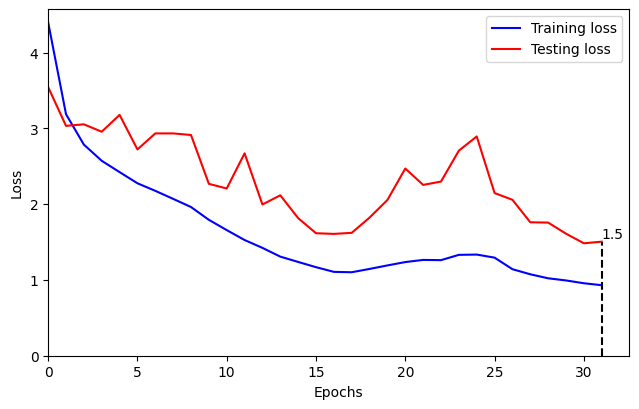

Traing epoch: 32   avg loss is: 0.9151196872152868
Testing epoch: 32   avg testing loss is: 1.4119823803411466
Testing on epoch: 32 has accuracy: top1: 83.52 top5: 96.84


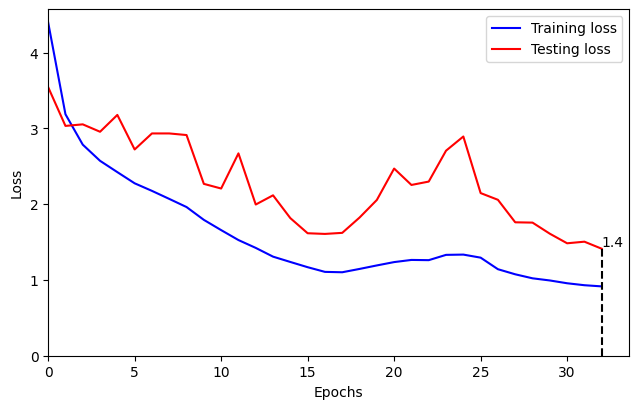

Traing epoch: 33   avg loss is: 0.8993642817692262
Testing epoch: 33   avg testing loss is: 1.4111564493624964
Testing on epoch: 33 has accuracy: top1: 83.91 top5: 96.35


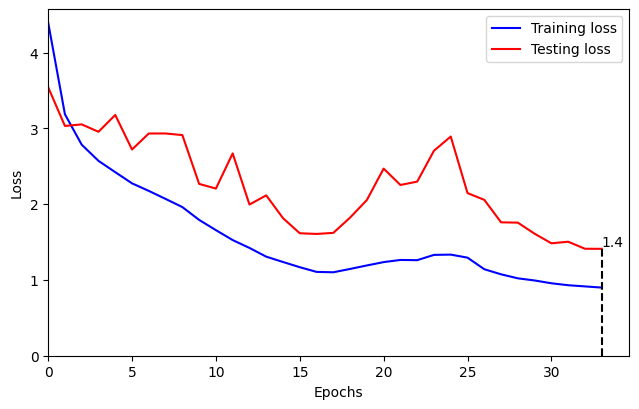

Traing epoch: 34   avg loss is: 0.9036953611200264
Testing epoch: 34   avg testing loss is: 1.451498728303523
Testing on epoch: 34 has accuracy: top1: 82.21 top5: 95.98


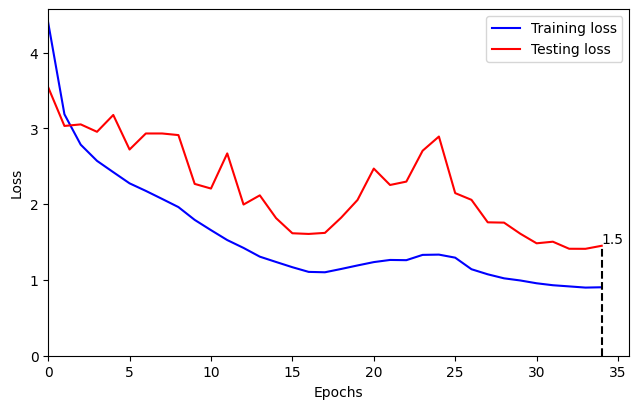

Traing epoch: 35   avg loss is: 0.9218175316057285
Testing epoch: 35   avg testing loss is: 1.6390851331277057
Testing on epoch: 35 has accuracy: top1: 75.31 top5: 93.72


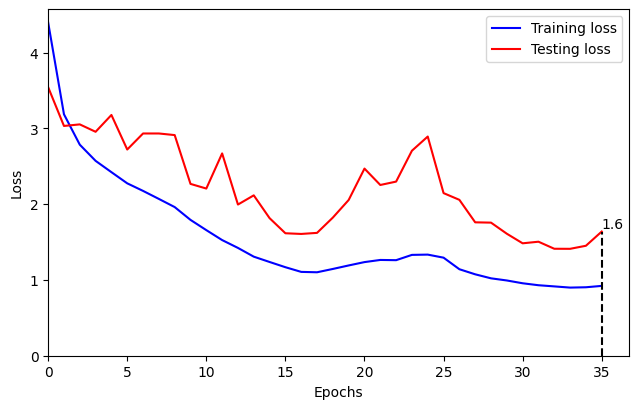

Traing epoch: 36   avg loss is: 0.9675918353371927
Testing epoch: 36   avg testing loss is: 1.7636757687987568
Testing on epoch: 36 has accuracy: top1: 72.21 top5: 92.69


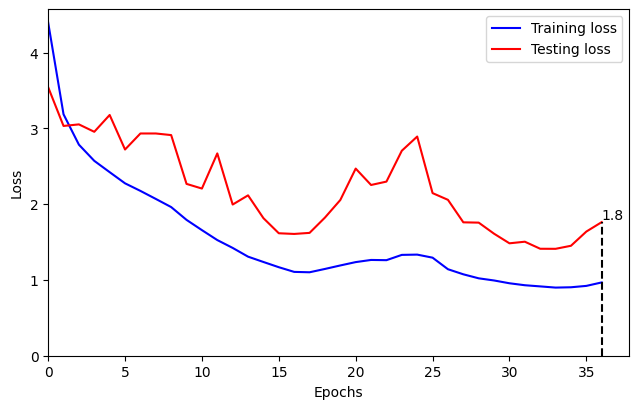

Traing epoch: 37   avg loss is: 1.005002543705852
Testing epoch: 37   avg testing loss is: 1.756743832169292
Testing on epoch: 37 has accuracy: top1: 71.72 top5: 92.61


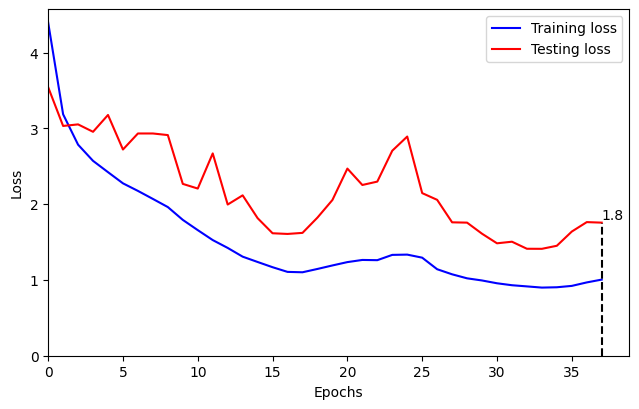

Traing epoch: 38   avg loss is: 1.040846381033836
Testing epoch: 38   avg testing loss is: 1.865221886619972
Testing on epoch: 38 has accuracy: top1: 69.22 top5: 91.94


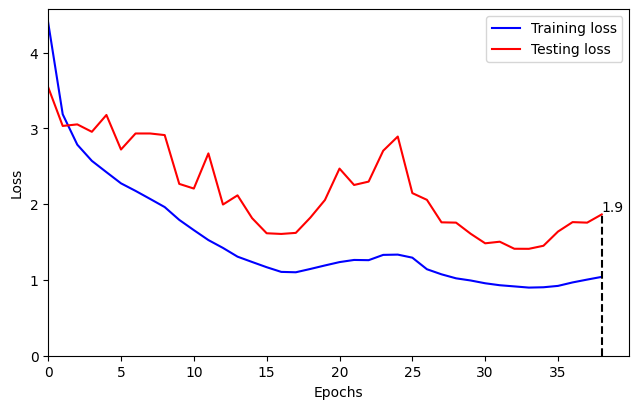

Traing epoch: 39   avg loss is: 1.0950670260675146
Testing epoch: 39   avg testing loss is: 2.653055605487289
Testing on epoch: 39 has accuracy: top1: 52.86 top5: 80.26


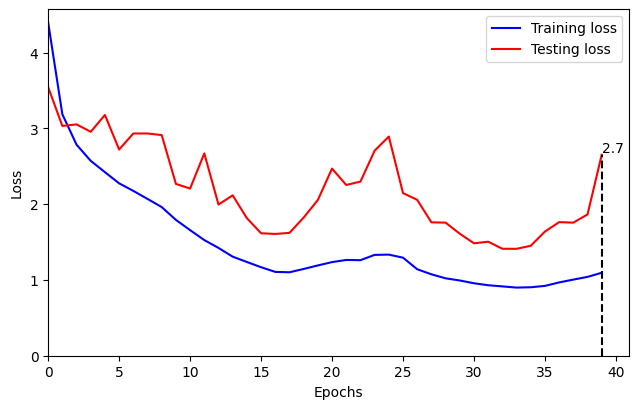

Traing epoch: 40   avg loss is: 1.0976412873976038
Testing epoch: 40   avg testing loss is: 2.6532143350702206
Testing on epoch: 40 has accuracy: top1: 50.63 top5: 80.75


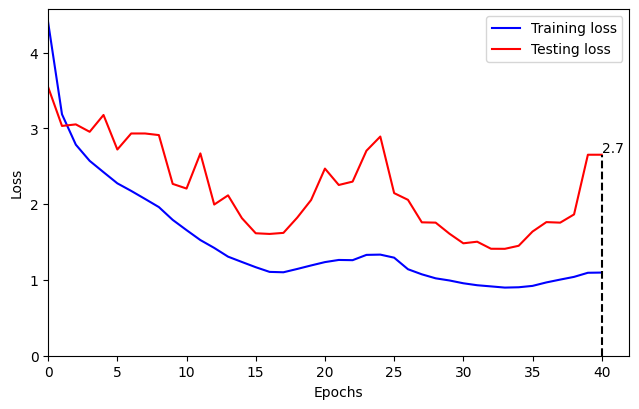

Traing epoch: 41   avg loss is: 1.1327204372034687
Testing epoch: 41   avg testing loss is: 2.2166884216564093
Testing on epoch: 41 has accuracy: top1: 59.53 top5: 87.17


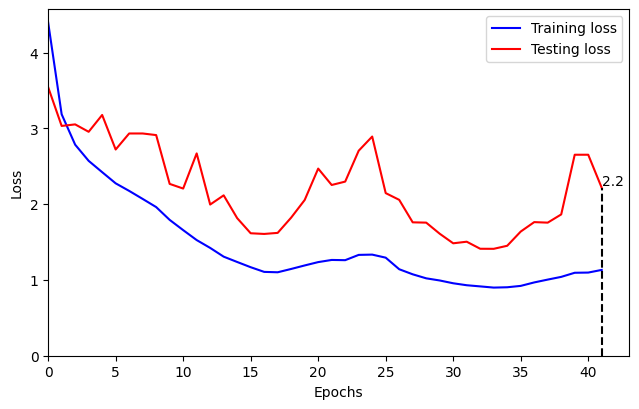

Traing epoch: 42   avg loss is: 1.0568308439575325
Testing epoch: 42   avg testing loss is: 1.6132620264807966
Testing on epoch: 42 has accuracy: top1: 76.48 top5: 94.93


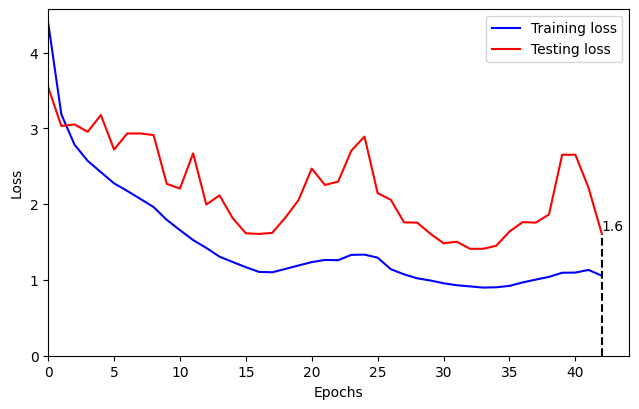

Traing epoch: 43   avg loss is: 0.98516620674721
Testing epoch: 43   avg testing loss is: 1.6358872091287393
Testing on epoch: 43 has accuracy: top1: 75.99 top5: 93.84


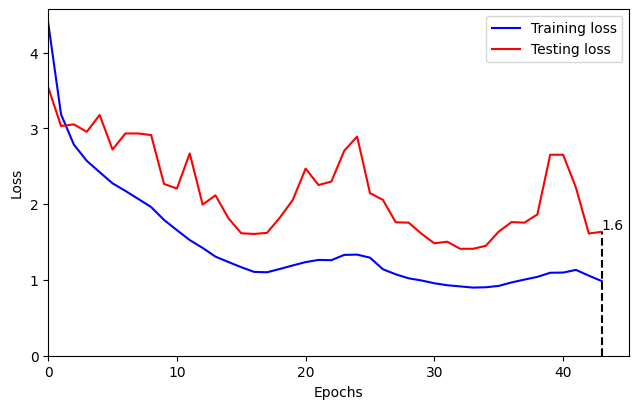

Traing epoch: 44   avg loss is: 0.9472005901550379
Testing epoch: 44   avg testing loss is: 1.604518673130285
Testing on epoch: 44 has accuracy: top1: 76.61 top5: 93.95


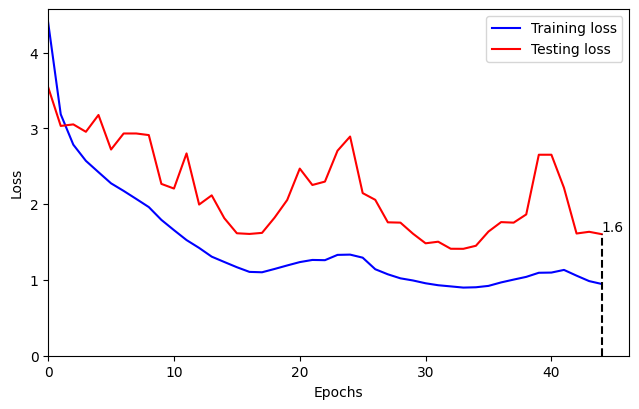

Traing epoch: 45   avg loss is: 0.9228429966280106
Testing epoch: 45   avg testing loss is: 1.4886913585514294
Testing on epoch: 45 has accuracy: top1: 81.72 top5: 95.69


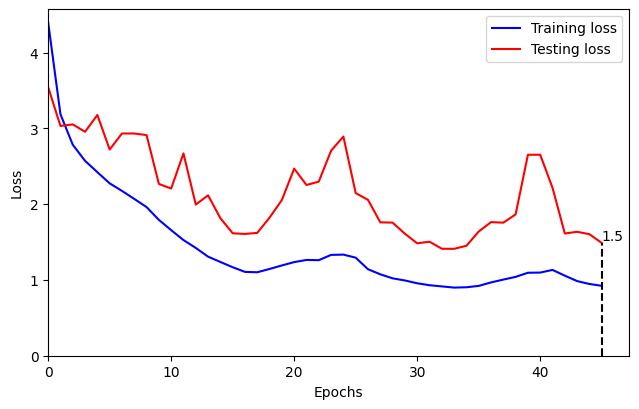

Traing epoch: 46   avg loss is: 0.8976141044071743
Testing epoch: 46   avg testing loss is: 1.436932745937989
Testing on epoch: 46 has accuracy: top1: 82.47 top5: 95.92


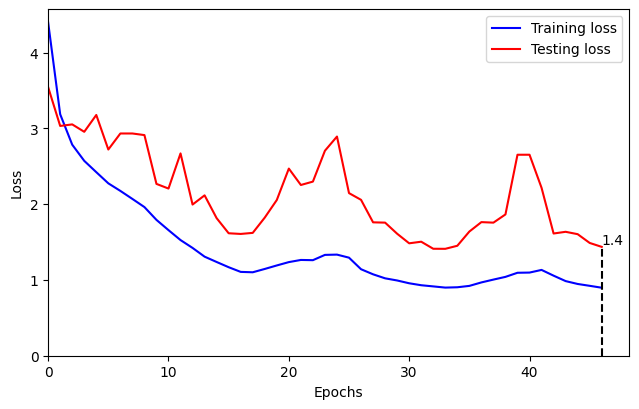

Traing epoch: 47   avg loss is: 0.8802234129745419
Testing epoch: 47   avg testing loss is: 1.4753655191522521
Testing on epoch: 47 has accuracy: top1: 81.06 top5: 95.46


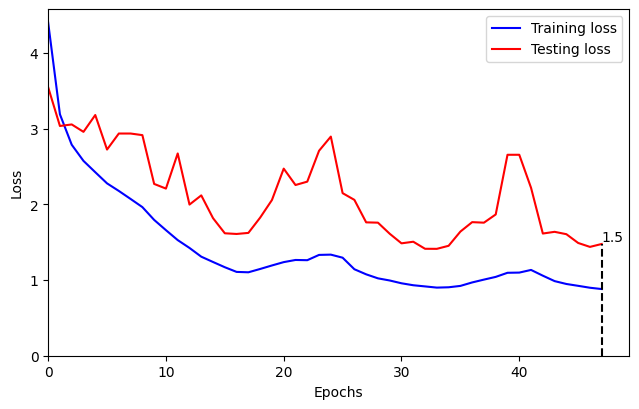

Traing epoch: 48   avg loss is: 0.8747208108421133
Testing epoch: 48   avg testing loss is: 1.433845980145107
Testing on epoch: 48 has accuracy: top1: 83.67 top5: 96.06


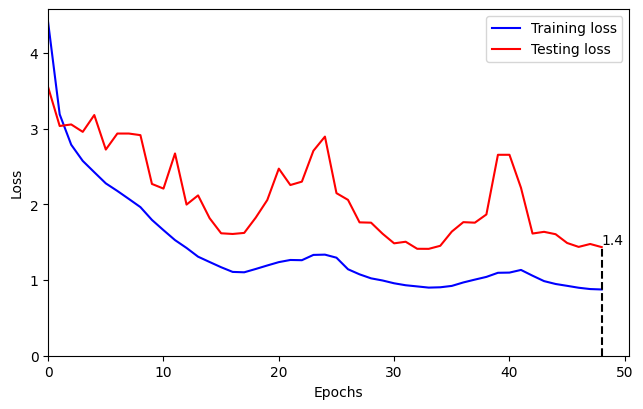

Traing epoch: 49   avg loss is: 0.8625289445497742
Testing epoch: 49   avg testing loss is: 1.4229766321702166
Testing on epoch: 49 has accuracy: top1: 83.81 top5: 95.94


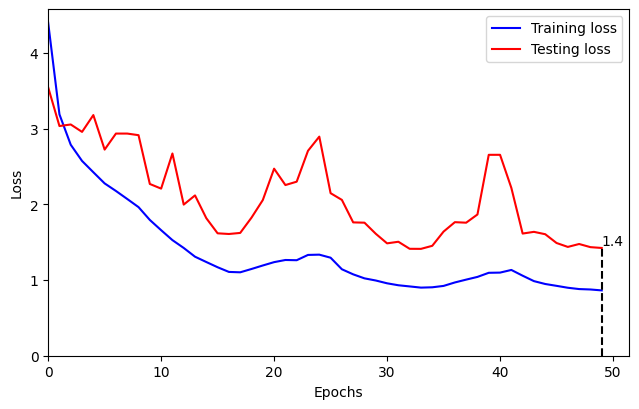

In [3]:
class DeepWriter_Train:
    def __init__(self,dataset='CERUG-EN',imgtype='png',mode='vertical'):

        self.dataset = dataset
        self.folder = dataset
        self.mode = mode
        #self.labelfolder = 'dataset/'

        if not os.path.exists(self.folder):
            if dataset == 'CERUG-EN':
                pass
                #download_cerug(dataset)
            elif dataset == 'Firemaker':
                download_firemaker(dataset)
            else:
                print('****** Warning: the dataset %s does not existed!******'%dataset)
                print('Please go to the following website to check how to download the dataset:')
                print('https://www.ai.rug.nl/~sheng/writeridataset.html')
                print('*'*20)
                raise ValueError('Dataset: %s does not existed!'%dataset)

        self.labelfolder = self.folder
        #self.train_folder = self.folder+'/train/'
        self.train_folder = '/kaggle/input/cerug-en/CERUG-EN-train-images/train/'
        #self.test_folder = self.folder+'/test/'
        self.test_folder = '/kaggle/input/cerug-en/CERUG-EN-test-images/test/'

        self.imgtype=imgtype
        self.mode = mode
        self.device = 'cuda'
        self.scale_size=(64,128)

        if self.device == 'cuda':
            torch.backends.cudnn.benchmark = True

        if self.dataset == 'CVL':
            self.imgtype = 'tif'

        self.model_dir = 'model'
        if not os.path.exists(self.model_dir):
            #raise ValueError('Model directory: %s does not existed'%self.model_dir)
            os.mkdir(self.model_dir)#raise ValueError('Model directory: %s does not existed'%self.model_dir)

        basedir = 'GRRNN_WriterIdentification_dataset_'+self.dataset+'_model_'+self.mode+'_aug_16'
        self.logfile= basedir + '.log'
        self.modelfile = basedir
        self.batch_size = 16

        train_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.train_folder,
                        imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = True)

        self.training_data_loader = DataLoader(dataset=train_set, num_workers=0,
                           batch_size=self.batch_size, shuffle=True)

        test_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.test_folder,imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = False)

        self.testing_data_loader = DataLoader(dataset=test_set, num_workers=0,
                           batch_size=self.batch_size, shuffle=False)

        num_class = train_set.num_writer
        self.model = GrnnNet(1,num_classes=train_set.num_writer,mode=self.mode).to(self.device)

        #self.criterion = nn.CrossEntropyLoss()
        self.criterion = LabelSomCE()
        self.optimizer = optim.Adam(self.model.parameters(),lr=1.0e-5,weight_decay=1e-4, betas=(0.95, 0.999))
        self.scheduler = CyclicLR(self.optimizer, base_lr=1.0e-5, max_lr=1.2e-4, step_size_up=3000, step_size_down=3000, cycle_momentum=False, mode='triangular')
        #self.scheduler = lr_scheduler.StepLR(self.optimizer,step_size=10,gamma=0.5)

    def train(self,epoch):
        self.model.train()
        losstotal = []

        for iteration,batch in enumerate(self.training_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].type(torch.long).to(self.device)


            self.optimizer.zero_grad()

            logits = self.model(inputs)

            train_loss= self.criterion(logits,target)

            losstotal.append(train_loss.item())
            train_loss.backward()
            self.optimizer.step()
            self.scheduler.step()


        with open(self.logfile,'a') as fp:
            fp.write('Training epoch %d avg loss is: %.6f\n'%(epoch,np.mean(losstotal)))
        print('Traing epoch:',epoch,'  avg loss is:',np.mean(losstotal))
        return np.mean(losstotal)


    def test(self,epoch,during_train=True):
        self.model.eval()
        losstotal = []

        if not during_train:
            self.load_model(epoch)

        top1 = 0
        top5 = 0
        ntotal=0

        for iteration,batch in enumerate(self.testing_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].to(self.device).long()

            logits = self.model(inputs)

            test_loss = self.criterion(logits,target)

            losstotal.append(test_loss.item())

            res = self.accuracy(logits,target,topk=(1,5))
            top1 += res[0]
            top5 += res[1]

            ntotal += inputs.size(0)


        top1 /= float(ntotal)
        top5 /= float(ntotal)

        print('Testing epoch:',epoch,'  avg testing loss is:',np.mean(losstotal))
        print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
        with open(self.logfile,'a') as fp:
            fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))

        return np.mean(losstotal)

    def check_exists(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        return os.path.exists(model_out_path)

    def checkpoint(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        torch.save(self.model.state_dict(),model_out_path)


    def load_model(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        self.model.load_state_dict(torch.load(model_out_path,map_location=self.device))
        print('Load model successful')


    def plot_losses(self, training_losses, testing_losses):
        indices = range(len(training_losses))
        plt.figure(figsize=(7.5, 4.5))
        plt.plot(indices, training_losses, 'b', label='Training loss')
        plt.plot(indices, testing_losses, 'r', label='Testing loss')
        #plt.title('Training and Testing Losses')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.xlim(left=0)
        plt.ylim(bottom=0)

        last_epoch = indices[-1]
        last_test_loss = testing_losses[-1]
        plt.plot([last_epoch, last_epoch], [0, last_test_loss], 'k--')
        plt.text(last_epoch, last_test_loss, f'{last_test_loss:.1f}', color='k', va='bottom', ha='left')

        plt.show()


    def train_loops(self,start_epoch,num_epoch):
        #if self.check_exists(num_epoch): return
        if start_epoch > 0:
            self.load_model(start_epoch-1)

        training_losses = []
        testing_losses = []

        for epoch in range(start_epoch,num_epoch):

            train_loss = self.train(epoch)
            training_losses.append(train_loss)
            self.checkpoint(epoch)
            test_loss = self.test(epoch)
            testing_losses.append(test_loss)
            #self.scheduler.step()
            self.plot_losses(training_losses, testing_losses)


    def accuracy(self,output,target,topk=(1,)):
        with torch.no_grad():
            maxk = max(topk)
            _,pred = output.topk(maxk,1,True,True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                res.append(correct_k.data.cpu().numpy())

        return res


if __name__ == '__main__':

    modelist = ['vertical','horzontal']
    mode = modelist[1]

    mod = DeepWriter_Train(dataset='CERUG-EN',mode=mode)
    mod.train_loops(0,50)